# Linear and Logistic Regression
- **100 points**

### Instructions
- you cannot use any other library.Write the code from scratch.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.
- link for the datasets - https://drive.google.com/drive/folders/1MXmIChMxodGbEpowyVJBFLdvaDpj23gd?usp=sharing


## Question 1 (50 points)

## Linear Regression

In this section, we'll implement a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

In [ ]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [ ]:
df = pd.read_csv('./heights.csv')

In [ ]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


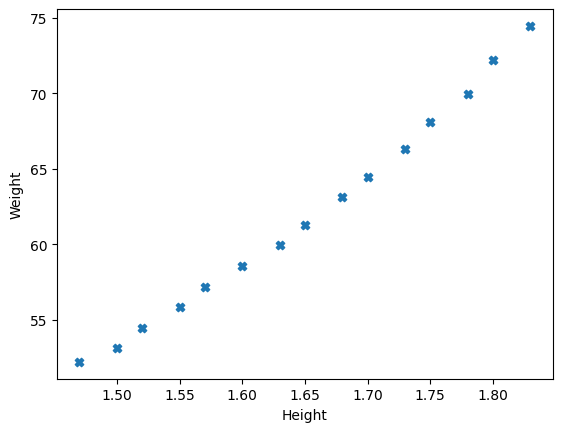

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [ ]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [ ]:
class LinearRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a linear regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        ######################
        #   YOUR CODE HERE   #
        ######################
        # You may add additional fields


    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        self.m, self.n = X.shape
        self.w = np.zeros((self.n))
        self.b = 0
        self.X = X
        self.Y = y

        for i in range(self.epochs):
            self.update_weights(X,y)





    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights using batch gradient descent.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        Y_prediction = self.predict(X)

        dw = -(X.T).dot(y - Y_prediction)/self.m

        db = -np.sum(y - Y_prediction)/self.m
        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db




    def predict(self, X):
        """
        Predict values using the weights.

        Args:
            X: features

        Returns:
            The predicted value.
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        return X.dot(self.w) + self.b






### Build the model and train on the dataset.

In [ ]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (10 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [ ]:
def mean_squared_error(y_pred, y_actual):
    """
    Calculates the mean squared error between two vectors.

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The mean squared error.
    """
    ######################
    #   YOUR CODE HERE   #
    ######################
    actual = np.array(y_actual)
    predicted = np.array(y_pred)
    return np.mean((y_actual - y_pred) ** 2)



In [ ]:
print(y_pred.shape)
print(X_train.shape)
print(y_train.shape)

(15,)
(15, 1)
(15,)


### Make predictions using the model and evaluate it.

In [ ]:
y_pred = model.predict(X_train)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.5197


### Plot the predicted and the actual values.

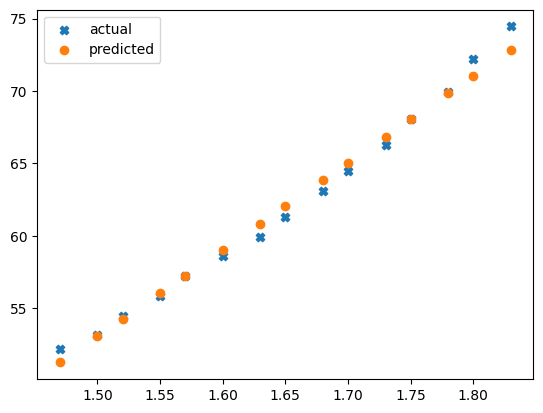

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()


### Multiple linear regression for sales prediction

Next we use our linear regression model to learn the relationship between sales and advertising budget for a product. The `advertise.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.  

We will train a linear regression model to predict the sales of the product given the TV, radio, and newspaper ad budgets.

In [ ]:
df = pd.read_csv('./advertise.csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

### Split the data into train and test set.

In [ ]:
def split_indices(n, test_frac, seed):
    """
    Provides indices for creating training and test set.
    """
    # Determine the size of the test set
    n_test = int(test_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_test indices for test set
    return idxs[n_test:], idxs[:n_test]

In [ ]:
test_frac = 0.2 ## Set the fraction for the test set
rand_seed = 42 ## Set the random seed

train_indices, test_indices = split_indices(df.shape[0], test_frac, rand_seed)
print("#samples in training set: {}".format(len(train_indices)))
print("#samples in test set: {}".format(len(test_indices)))

#samples in training set: 160
#samples in test set: 40


In [ ]:
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

### Build the model and train on the dataset.

In [ ]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

<ipython-input-170-36ec73073836>:63: RuntimeWarning: invalid value encountered in subtract
  self.w = self.w - self.lr * dw


### (10 points) Evaluation on training and test set.
If you have implemented `LinearRegression` correctly, the **test MSE** should be < 3.

In [ ]:
print("Training MSE: {:.4f}".format(mean_squared_error(model.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model.predict(X_test), y_test)))

Training MSE: nan
Test MSE: nan


## Question 2 (50 points)

## Logistic Regression

In this section, we'll implement a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

### Data Preparation
Once again, to keep things simple, first we'll use the heights and weights dataset to test our implementation. Let's divide the weights into 2 categories: 0 if the weight is < 60 and 1 otherwise. Our goal is to predict the weight category of an individual given their height using a logistic regression model.

In [ ]:
df = pd.read_csv('./heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [ ]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LogisticRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [ ]:
class LogisticRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a logistic regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        ######################
        #   YOUR CODE HERE   #
        ######################
        # You may add additional fields

    # Function for model training
    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        self.m, self.n = X.shape
        self.W = np.zeros( self.n )
        self.b = 0
        self.X = X
        self.y = y


        for i in range( self.epochs ) :
            self.update_weights(X,y)



    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights in gradient descent.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )

        tmp = ( A - self.y.T )
        tmp = np.reshape( tmp, self.m )
        dW = np.dot( self.X.T, tmp ) / self.m
        db = np.sum( tmp ) / self.m

        self.W = self.W - self.lr * dW
        self.b = self.b - self.lr * db



    def predict(self, X):
        """
        Predict probabilities using the weights.

        Args:
            X: features

        Returns:
            The predicted probability.
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )
        Y = np.where( Z > 0.5, 1, 0 )
        return Y



### Build the model and train on the dataset.

In [ ]:
model = LogisticRegression(0.1, 100000)
model.train(X_train, y_train)

### (20 points) Implement the evaluation metric `accuracy`.
We use the [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) as the metric to evaluate our model.

In [ ]:
def accuracy(y_pred, y_actual):
    """
    Calculates the accuracy of the predictions (binary values).

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The accuracy.
    """
    ######################
    #   YOUR CODE HERE   #
    ######################
    acc = np.sum(np.equal(y_actual, y_pred)) / len(y_actual)
    return acc



### Make predictions using the model and evaluate it.

In [ ]:
y_pred_probs = model.predict(X_train)
y_pred = (y_pred_probs >= 0.5).astype('float')
print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))

Train Accuracy: 1.0


### Plot the predicted and the actual values.

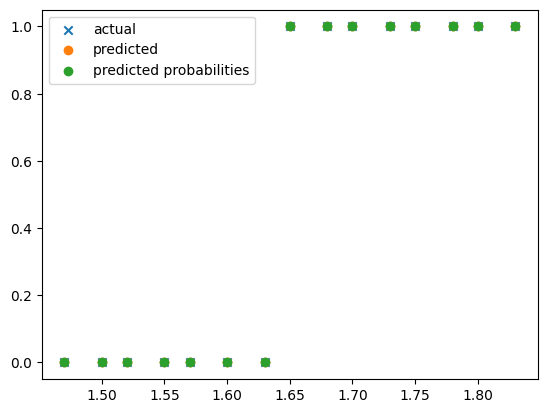

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.scatter(X_train, y_pred_probs, marker='o', label='predicted probabilities')
plt.legend()
plt.show()

# Resources I used
1. linear reg from scratch https://www.geeksforgeeks.org/solving-linear-regression-without-using-sklearn-and-tensorflow/
2. MSE https://datagy.io/mean-squared-error-python/
3. linear reg model video from scratch https://youtu.be/p9CsSf_x-wk
4. accuracy https://stackoverflow.com/questions/64680195/calculate-the-accuracy-of-a-machine-learning-model-without-sklearn